# Data Wrangling Template


## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#### Image Predictions

In [3]:
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [4]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

#### Tweepy Data

In [5]:
tweets_data=[]
with open('tweet-json.txt') as file:
    for line in file:
        tweet=json.loads(line)
        tweets_data.append(tweet)
df_api=pd.DataFrame(tweets_data,columns=list(tweets_data[0].keys()))

In [6]:
df_json=df_api[['id','retweet_count','favorite_count']]
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Twitter Archive

In [7]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Assess

#### *twitter_archive*

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.tail(
)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive.duplicated().sum()

0

In [12]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [13]:
twitter_archive[twitter_archive.name.str.islower() == True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [14]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

###### observations
 *Quality*
* tweet id is float must be string or object
* time stamp is not a datetime variable

* (_) in colomn names should be replaced by white spaces
* rating denominator must be 10 in all rows
* Faulty names must be removed

*Tidiness*

* dog stages needs to be represented in one column

#### Image predictions

In [15]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [19]:
image_predictions.duplicated().sum()

0

#### Observations
*Quality*

* tweet_id is float not string or object
* column names is not describable
* p1,p2 and p3 contain (_) instead of white space
* remove unwanted columns

*Tidiness*

* All tables should be merged

#### Tweepy data (JSON)

In [20]:
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
df_json.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [22]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
df_json.duplicated().sum()

0

In [24]:
df_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

## Clean

In [25]:
twitter_archive_copy=twitter_archive.copy()
image_predictions_copy=image_predictions.copy()
df_json_copy=df_json.copy()

### We'll start with *twitter_archive*

### Define
Set all rating denominators to 10

### Code

In [26]:
twitter_archive_copy.rating_denominator=10

### Test

In [27]:
twitter_archive_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None


### Define
Remove all unacceptable names

### Code

In [28]:
mask = twitter_archive_copy.name.str.islower()
column_name = 'name' 
twitter_archive_copy.loc[mask, column_name] = np.nan

### Define
Convert time stamp to datetime variable

### Code

In [29]:
twitter_archive_copy['timestamp']=pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy['year'] = twitter_archive_copy['timestamp'].dt.year
twitter_archive_copy['month'] = twitter_archive_copy['timestamp'].dt.month
twitter_archive_copy['day'] = twitter_archive_copy['timestamp'].dt.day
twitter_archive_copy = twitter_archive_copy.drop('timestamp', 1)


### Test

In [30]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,7,29


### Define
Convert the three dog stages into one column

### Code

In [31]:
def dog_stage(row):
    stage=[]
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if not stage:
        return 'None'
    else:
        return ','.join(stage)
twitter_archive_copy['dog_stage']=twitter_archive_copy.apply(lambda row:dog_stage(row) , axis=1)


### Test

In [32]:
twitter_archive_copy.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Define

change tweet_id to string

### Code

In [33]:
twitter_archive_copy['tweet_id']=twitter_archive_copy['tweet_id'].astype('str')

### Test

In [38]:
twitter_archive_copy['tweet_id'].dtypes

dtype('O')

### Define

Remove retweet data

### Code

In [43]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_user_id.isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_timestamp.isnull()]

### Test

In [44]:
print(sum(twitter_archive_copy.retweeted_status_user_id.value_counts()))

0


### Define

Remove(< /a >) in the beginning of source

### Code

In [46]:
twitter_archive_copy.source=twitter_archive_copy.source.apply(lambda x: x[-len(twitter_archive_copy.source[0])+3:])

### Test

In [47]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage
0,892420643555336193,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,None
1,892177421306343426,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,1,None
2,891815181378084864,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017,7,31,None
3,891689557279858688,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017,7,30,None
4,891327558926688256,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017,7,29,None


### Image_predictions

### Define

replace (_) and (-) with white space in p1, p2 and p3 columns

### Code

In [48]:
image_predictions_copy.p1=image_predictions_copy.p1.str.replace('_',' ')
image_predictions_copy.p2=image_predictions_copy.p2.str.replace('_',' ')
image_predictions_copy.p3=image_predictions_copy.p3.str.replace('_',' ')

image_predictions_copy.p1=image_predictions_copy.p1.str.replace('-',' ')
image_predictions_copy.p2=image_predictions_copy.p2.str.replace('-',' ')
image_predictions_copy.p3=image_predictions_copy.p3.str.replace('-',' ')

### Test

In [49]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
change the tweet_id to string

### Code

In [50]:
image_predictions_copy['tweet_id']=image_predictions_copy['tweet_id'].astype('str')

### Test

In [51]:
image_predictions_copy['tweet_id'].dtypes

dtype('O')

### Define
change undescribable column names

### Code

In [52]:
image_predictions_copy.rename(columns={'p1':'dog type'},inplace=True)

### Test

In [53]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,dog type,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
Drop unnecessary columns

In [54]:
image_predictions_copy.drop(['img_num','p1_dog','p2_dog','p2', 'p2_conf','p3','p3_conf','p3_dog','p1_conf',],axis=1,inplace=True)

### Test

In [55]:
image_predictions_copy.head()

,tweet_id,jpg_url,dog type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher


### Merging twitter_archive and tweepy data

In [56]:
df_json_copy.rename(columns={'id':'tweet_id'},inplace=True)
df_json_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [57]:
df_json_copy['tweet_id']=df_json_copy['tweet_id'].astype('str')
type(df_json_copy['tweet_id'].iloc[0])

str

In [58]:
df_merge=pd.merge(twitter_archive_copy,image_predictions_copy,on=['tweet_id'],how='inner')
df_merge=pd.merge(df_merge,df_json_copy,on=['tweet_id'],how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1896 non-null object
year                          1994 non-null int64
month                         1994 non-null int64
day                           1994 non-null int64
dog_stage                     1994 non-null object
jpg_url                       1994 non-null object
dog type                      1994 non-n

## Storing Data

In [59]:
df_merge.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

In [60]:
wrangled_df=pd.read_csv('twitter_archive_master.csv')

In [61]:
wrangled_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,jpg_url,dog type,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,8853,39467
1,892177421306343426,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,1,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514,33819
2,891815181378084864,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017,7,31,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328,25461
3,891689557279858688,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017,7,30,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,8964,42908
4,891327558926688256,NaN,NaN,"href=""http://twitter.com/download/iphone"" rel=...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017,7,29,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774,41048


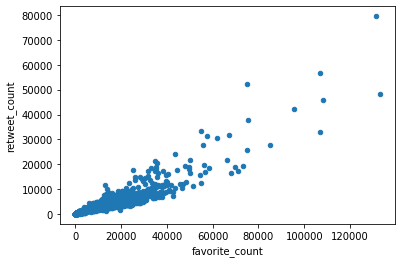

In [62]:
wrangled_df.plot(kind='scatter',x='favorite_count',y='retweet_count')

In [63]:
dog_type_mean = wrangled_df.groupby('dog type').mean()
dog_type_mean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,year,month,day,retweet_count,favorite_count
dog type,,,,,,,,,,,,,
Afghan hound,8.041621e+17,NaN,NaN,NaN,NaN,NaN,9.666667,10.0,2016.333333,7.666667,11.000000,5976.00,17326.666667
African crocodile,6.746648e+17,NaN,NaN,NaN,NaN,NaN,10.000000,10.0,2015.000000,12.000000,9.000000,276.00,994.000000
African grey,7.623165e+17,NaN,NaN,NaN,NaN,NaN,11.000000,10.0,2016.000000,8.000000,7.000000,1298.00,5350.000000
African hunting dog,6.711633e+17,NaN,NaN,NaN,NaN,NaN,8.000000,10.0,2015.000000,11.000000,30.000000,1198.00,1763.000000
Airedale,7.184489e+17,NaN,NaN,NaN,NaN,NaN,9.833333,10.0,2015.583333,8.750000,15.916667,1393.75,5280.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wombat,6.924261e+17,NaN,NaN,NaN,NaN,NaN,9.250000,10.0,2015.250000,10.500000,12.500000,2685.00,7683.000000
wood rabbit,6.780274e+17,NaN,NaN,NaN,NaN,NaN,10.666667,10.0,2015.333333,8.000000,18.333333,864.00,2535.000000
wooden spoon,8.363805e+17,NaN,NaN,NaN,NaN,NaN,12.000000,10.0,2017.000000,2.000000,28.000000,3337.00,16037.000000


In [64]:
dog_type_count = wrangled_df.groupby('dog type').count()
dog_type_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,jpg_url,retweet_count,favorite_count
dog type,,,,,,,,,,,,,,,,,,,
Afghan hound,3,0,0,3,3,0,0,0,3,3,3,3,3,3,3,3,3,3,3
African crocodile,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1
African grey,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1
African hunting dog,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1
Airedale,12,0,0,12,12,0,0,0,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wombat,4,0,0,4,4,0,0,0,4,4,4,3,4,4,4,4,4,4,4
wood rabbit,3,0,0,3,3,0,0,0,3,3,3,3,3,3,3,3,3,3,3
wooden spoon,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1


In [65]:
dog_type_sorted = dog_type_mean['rating_numerator'].sort_values()

dog_type_sorted

dog type
traffic light                    0.000000
lacewing                         1.000000
electric fan                     1.000000
maze                             2.000000
scorpion                         2.000000
                                  ...    
soft coated wheaten terrier     25.454545
clumber                         27.000000
lakeside                       108.000000
microphone                     420.000000
bow tie                        451.500000
Name: rating_numerator, Length: 374, dtype: float64

In [66]:
wrangled_df['dog type'].value_counts()


golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
hammer                  1
traffic light           1
bakery                  1
snowmobile              1
earthstar               1
Name: dog type, Length: 374, dtype: int64

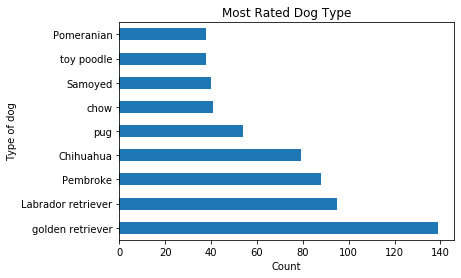

In [67]:
dog_type = wrangled_df.groupby('dog type').filter(lambda x: len(x) >= 30)

dog_type['dog type'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');